# Derivas de concepto en la cadena de bloques. Método KSWIN

Detección de derivas de concepto en la cadena de bloques, a partir del método Kolmogorov-Smirnov Windowing (KSWIN), con salida gráfica.

In [1]:
!pip install river

Defaulting to user installation because normal site-packages is not writeable


In [2]:
from btc_connect import btc_connect
from river import drift
import datetime, matplotlib.pyplot as plt

In [3]:
# Conección al nodo local
rpc_connection = btc_connect()

In [4]:
# Intervalo de bloques
start = 800000 # Inicio: 0 
end = 852999 # Para último bloque de la cadena: rpc_connection.getblockcount() 

In [5]:
# Adaptación de función para graficar el total de transacciones por bloque y las derivas de concepto detectadas
# https://riverml.xyz/latest/introduction/getting-started/concept-drift-detection/
def plot_transaction(x, y, xlabel, drift=None):
    fig, ax = plt.subplots(figsize=(8,4))
    ax.plot(x, y, color="navajowhite", label="transacciones")
    ax.set_ylim(bottom=0)
    ax.set_title("Número de transacciones por bloque")
    ax.set_xlabel(xlabel)
    ax.set_ylabel("Transacciones")
    if drift is not None:
        legend=0
        for drift_detected in drift:
            if legend==0:
                ax.axvline(drift_detected, color="red", linestyle=":", label="derivas de concepto")
                legend=1
            else:
                ax.axvline(drift_detected, color="red", linestyle=":")
    fig.legend(loc="outside upper left")
    plt.show()

In [6]:
block_number = []
transactions = []

# KSWIN Valores por defecto:
# https://riverml.xyz/dev/api/drift/KSWIN/
# alpha=0.005         -> Probabilidad para la estadística de prueba de Kolmogorov-Smirnov 
# window_size=100     -> Tamaño de la ventana deslizante (de tamaño fijo)
# stat_size=30        -> Tamaño de la ventana de estadísticas
# seed=None           -> Semilla aleatoria (una misma semilla genera los mismos valores aleatorios, con el fin de conseguir reproducibilidad)
# window=None         -> Evita el arranque en frío, en caso de que ya se hayan recopilado datos

drift_detector = drift.KSWIN()

block_drift = []  # Bloques en los que se detecta una deriva de concepto
block_transactions_drift = []  # Total de transacciones de dichos bloques
block_datetime_drift = []  # Marca temporal de los bloques

for i in range (start, end + 1):
    blockhash = rpc_connection.getblockhash(i)  # Obtiene el hash del bloque
    block = rpc_connection.getblock(blockhash)  # Obtiene el bloque
    block_number.append(i)
    transactions.append(block["nTx"])  # Número de transacciones del bloque

    drift_detector.update(block["nTx"])
    if drift_detector.drift_detected:  # Deriva de concepto detectada
        block_drift.append(i)
        block_transactions_drift.append(block["nTx"])
        block_datetime_drift.append(datetime.datetime.fromtimestamp(block["time"]))

xlabel = f"Bloques: {start} a {end}"

### Derivas de concepto detectadas

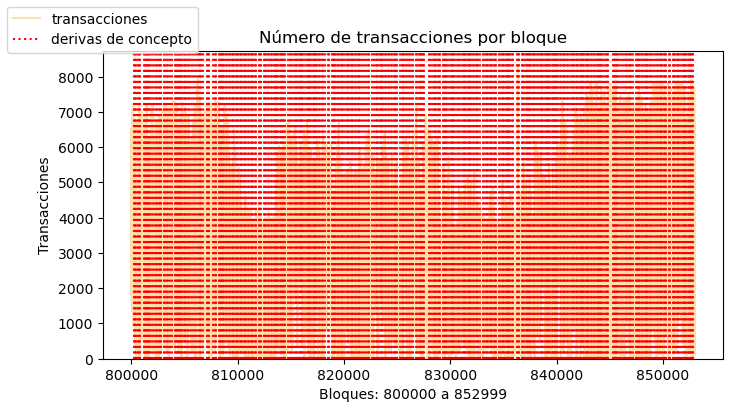

In [7]:
plot_transaction(block_number, transactions, xlabel, block_drift)

### Bloque de comienzo, número de transacciones y marca temporal de minado

In [8]:
for x, y, z in (zip(block_drift, block_transactions_drift, block_datetime_drift)):
    print(f"Bloque {x}: {y} transacciones - {z.strftime('%d/%m/%Y %H:%M:%S')}")

Bloque 800276: 2358 transacciones - 26/07/2023 03:44:35
Bloque 800376: 1220 transacciones - 26/07/2023 18:30:32
Bloque 800478: 5833 transacciones - 27/07/2023 13:10:01
Bloque 800609: 4067 transacciones - 28/07/2023 11:58:04
Bloque 800730: 4299 transacciones - 29/07/2023 06:42:59
Bloque 800830: 1168 transacciones - 30/07/2023 03:37:01
Bloque 801154: 2998 transacciones - 01/08/2023 06:56:38
Bloque 801256: 2898 transacciones - 01/08/2023 23:25:05
Bloque 801356: 4577 transacciones - 02/08/2023 14:51:49
Bloque 801456: 2849 transacciones - 03/08/2023 06:27:28
Bloque 801571: 2415 transacciones - 04/08/2023 00:52:20
Bloque 801672: 3378 transacciones - 04/08/2023 19:34:37
Bloque 801772: 4882 transacciones - 05/08/2023 14:36:23
Bloque 801937: 6974 transacciones - 06/08/2023 15:48:40
Bloque 802131: 1712 transacciones - 07/08/2023 20:48:18
Bloque 802322: 4371 transacciones - 09/08/2023 07:19:11
Bloque 802422: 1168 transacciones - 09/08/2023 21:45:13
Bloque 802607: 6812 transacciones - 11/08/2023 0